In [ ]:
import numpy as np
from sklearn.manifold import TSNE
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
from sklearn.decomposition import PCA

In [3]:
%run ../database.ipynb

In [21]:
all_data = get_all_content()

raw_lda_output = np.asarray([doc['topics'] for doc in all_data], dtype="object")

In [22]:
print("Raw lda_output shape:", raw_lda_output.shape)
print("Sample entry:", raw_lda_output[0])

Raw lda_output shape: (11757,)
Sample entry: [{'topic_id': 3, 'probability': 0.020600000396370888}, {'topic_id': 4, 'probability': 0.18240000307559967}, {'topic_id': 7, 'probability': 0.053300000727176666}, {'topic_id': 8, 'probability': 0.01600000075995922}, {'topic_id': 12, 'probability': 0.01119999960064888}, {'topic_id': 13, 'probability': 0.2184000015258789}, {'topic_id': 16, 'probability': 0.4542999863624573}]


In [ ]:
n_topics = 20
lda_output = np.zeros((len(all_data), n_topics))
for i, doc_topics in enumerate(raw_lda_output):
    for topic in doc_topics:
        topic_id = topic["topic_id"]
        prob = topic["probability"]
        lda_output[i, topic_id] = prob

In [ ]:
pca = PCA(n_components=10, random_state=42)
lda_pca = pca.fit_transform(lda_output)

explained_variance = sum(pca.explained_variance_ratio_)
print(f"Explained Variance: {explained_variance:.4f}")

Explained Variance: 0.9226


In [ ]:
for k in range(13,16):
    kmeans = KMeans(n_clusters=k, random_state=42, n_init=30)
    cluster_labels = kmeans.fit_predict(lda_pca)

    sil_score = silhouette_score(lda_pca, cluster_labels)
    print(f"{k}    Silhouette Score: {sil_score:.4f}")

13    Silhouette Score: 0.2222
14    Silhouette Score: 0.2237
15    Silhouette Score: 0.2233


In [40]:
k = 14
kmeans = KMeans(n_clusters=k, random_state=42, n_init=30)
cluster_labels = kmeans.fit_predict(lda_output)

In [43]:
tsne = TSNE(n_components=2, random_state=42, perplexity=50, n_iter=3000)
lda_output_2d = tsne.fit_transform(lda_output)

import pandas as pd
df = pd.DataFrame(lda_output_2d, columns=['x', 'y'])
df['Cluster'] = cluster_labels

c:\Users\wwwhh\OneDrive\Desktop\fyp backend\venv\Lib\site-packages\sklearn\manifold\_t_sne.py:1162: FutureWarning: 'n_iter' was renamed to 'max_iter' in version 1.5 and will be removed in 1.7.
  warnings.warn(


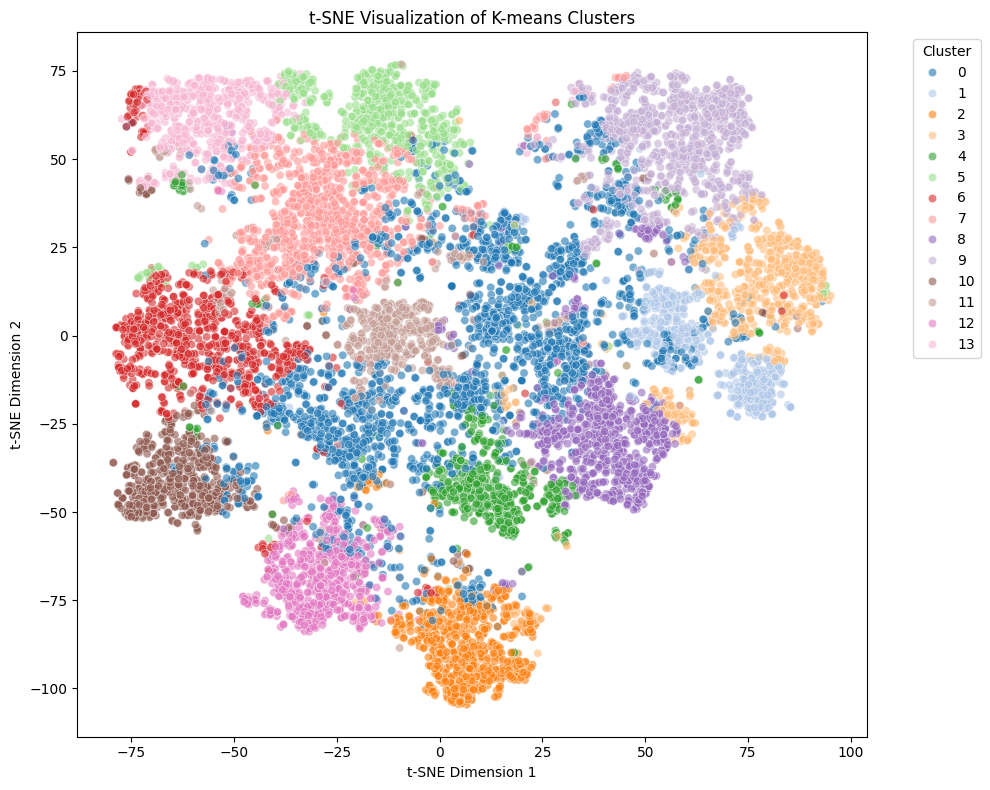

In [45]:
plt.figure(figsize=(10, 8))
sns.scatterplot(x='x', y='y', hue='Cluster', palette='tab20', data=df, legend='full', alpha=0.6)
plt.title('t-SNE Visualization of K-means Clusters')
plt.xlabel('t-SNE Dimension 1')
plt.ylabel('t-SNE Dimension 2')
plt.legend(title='Cluster', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()
plt.show()

In [ ]:
sil_score = silhouette_score(lda_output, cluster_labels)
print(f"Silhouette Score for k={k}: {sil_score:.3f}")

import pandas as pd
df = pd.DataFrame(lda_output, columns=[f"Topic_{i}" for i in range(n_topics)])
df['Cluster'] = cluster_labels
print("Cluster sizes:", df['Cluster'].value_counts())

Silhouette Score for k=21: 0.268
Cluster sizes: Cluster
3     869
2     804
20    746
4     725
11    702
9     658
16    651
7     622
5     604
0     532
6     530
13    522
12    481
1     455
8     447
14    428
19    425
17    423
18    402
15    376
10    336
Name: count, dtype: int64
